In [2]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf

In [4]:
plt.rcParams["figure.figsize"] = (12,12)

In [5]:
import sys
import glob

In [6]:
sys.path.append('../')

In [7]:
from bbox_utils.bbox import generate_default_boxes, generate_default_boxes, rotateRectangle
from src.config import *

In [8]:
from bbox_utils.numbaClipping import getIOU, getIOUOverallDefaultBox

In [9]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 1

In [10]:
prior_boxes, prior_boxes_coco = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

prior_boxes = np.array(prior_boxes, dtype=np.float64) * 300

prior_boxes_coco = np.array(prior_boxes_coco, dtype=np.float64)

prior_boxes_coco[:, :4] = prior_boxes_coco[:, :4] * 300

In [11]:
len(prior_boxes) == len(prior_boxes_coco)

True

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000036.txt') as f:
    data = f.readlines()

In [ ]:
data = data[0].split(',')
gt_box = list(map(float, data))
gt_box = gt_box[1:]

In [ ]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000000110.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [ ]:
plt.imshow(image)

In [ ]:
# for i in range(0, 8, 2):
#     gt_box[i] = gt_box[i] / height

# for i in range(1, 8, 2):
#     gt_box[i] = gt_box[i] / width

In [ ]:
gt_box

In [ ]:
gt_box = [0.523058530183727, 0.65878784, 0.6034454068241469, 0.5107554, 0.7110888976377953, 0.54469654, 0.6307020209973754, 0.692729]

In [ ]:
np.array(gt_box) * 300

In [ ]:
gt_box = np.array(gt_box)

gt_box = gt_box.reshape(4, 2)

prior_boxes= np.array(prior_boxes, dtype=np.float64)

for i in range(len(prior_boxes)):
    
    iou = getIOU(prior_boxes[i], gt_box)
    
    if iou > 0.5:
    
        corners = np.array(prior_boxes[i]) * 300

        corners = corners.astype(np.int32)

        corners = corners.reshape(4, 2)

        corners = corners.reshape((-1, 1, 2))

        image = cv2.polylines(image, [corners],
                              True, color, 1)

        
corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000049.txt') as f:
    data = f.readlines()
    
print(data)

In [ ]:
getIOU(prior_boxes[i], gt_box)

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000002089.txt.coco_theta') as f:
    datas = f.readlines()
    
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000002089.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (300, 300))

for i in range(len(datas)):
    data = datas[i].split(',')
    gt_box = list(map(float, data))
    gt_box = gt_box[1:]
    
    for i in range(0, 8, 2):
        gt_box[i] = gt_box[i] / height

    for i in range(1, 8, 2):
        gt_box[i] = gt_box[i] / width

    gt_box = np.array(gt_box, dtype=np.float64) * 300
            
    result = getIOUOverallDefaultBox(prior_boxes, gt_box)
    
    for i in range(len(result)):

        if result[i] > 0.5:

            corners = np.array(prior_boxes[i])

            corners = corners.astype(np.int32)

            corners = corners.reshape(4, 2)

            corners = corners.reshape((-1, 1, 2))

            image = cv2.polylines(image, [corners],
                                  True, color, 1)

        
    corners = np.array(gt_box)

    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
datas

In [ ]:
x = [587.18286,328.64633,602.2195,326.97562,604.62195,348.59756,589.5853,350.26828]

width = ( max(x[0], x[2], x[4], x[6]) + min(x[0], x[2], x[4], x[6]) ) / 2

height = ( max(x[1], x[3], x[5], x[7]) + min(x[1], x[3], x[5], x[7]) ) / 2

width, height

In [ ]:
width / height

In [ ]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000001390.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corners = np.array(x)

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, color, 2)

plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
result = getIOUOverallDefaultBox(prior_boxes, gt_box)

In [ ]:
result

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000036.txt') as f:
    data = f.readlines()
    
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000000036.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (300, 300))

data = data[0].split(',')
gt_box = list(map(float, data))
gt_box = gt_box[1:]

for i in range(0, 8, 2):
    gt_box[i] = gt_box[i] / height

for i in range(1, 8, 2):
    gt_box[i] = gt_box[i] / width
    
gt_box = np.array(gt_box)

gt_box = gt_box.reshape(4, 2)

prior_boxes= np.array(prior_boxes, dtype=np.float64)

for i in range(1000, 1050, 1):
    corners = np.array(prior_boxes[i])

    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, color, 1)

        
corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
np.array(prior_boxes[i])

In [ ]:
x[:-1]

In [ ]:
number_of_feature_maps = 6
def calculate_scale_of_default_boxes(k, m, s_max = 0.95, s_min = 0.2):
    return s_min + (s_max - s_min) * (k - 1) / (m - 1)

for k, f_k in enumerate(feature_map_shapes):
    s_k = calculate_scale_of_default_boxes(k, m = number_of_feature_maps, s_max = 0.8, s_min = 0.2)
    print(s_k)
    s_k_prime = np.sqrt(abs(s_k * calculate_scale_of_default_boxes(k + 1, m = 6)))

In [ ]:
prior_boxes = []

cx = 0.5
cy = 0.5

s_max = 0.7
s_min = 0.03

for k, f_k in enumerate(feature_map_shapes):
    if k == 1:
        s_k = calculate_scale_of_default_boxes(k + 1, m = number_of_feature_maps, s_max=s_max, s_min=s_min)
        s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = number_of_feature_maps, 
                                                                   s_max=s_max, s_min=s_min))

         # for the square box don't rotate by 90
#         for angle in angles[:-1]:
#             prior_boxes.append(rotateRectangle(cx, cy, s_k, s_k, angle, 'deg'))
#             prior_boxes.append(rotateRectangle(cx, cy, s_k_prime, s_k_prime, angle, 'deg'))

#         for angle in angles:
#             prior_boxes.append(rotateRectangle(cx, cy, s_k, s_k_prime, angle, 'deg'))

        for ar in aspect_ratios[k]:
            for angle in [0]:
                prior_boxes.append(rotateRectangle(cx, cy, s_k*np.sqrt(ar), s_k/np.sqrt(ar), angle, 'deg'))
                prior_boxes.append(rotateRectangle(cx, cy, s_k_prime*np.sqrt(ar), s_k_prime/np.sqrt(ar), angle, 'deg'))
            
prior_boxes = np.array(prior_boxes) * 300

In [ ]:
len(prior_boxes)

In [ ]:
image = np.zeros((300, 300, 3))

for corners in prior_boxes:
    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, color, 1)
    
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000086229.txt') as f:
    gt_boxes = f.readlines()
    
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000086229.txt.coco_theta') as f:
    gt_boxes_coco = f.readlines()

In [12]:
from data_pipeline.getData import read_data, resize_images_and_labels

In [82]:
image, labelled_gt_box_coords, labelled_gt_coco = read_data('COCO_train2014_000000086229', 
                                      '/Users/usmanr/fiftyone/coco-2014/train/data/', 
                                      '/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/', 
                                      '.jpg')

In [83]:
labelled_gt_box_coords[0]

[17,
 178.89555,
 214.51968,
 608.2778,
 150.64462,
 636.00006,
 336.99997,
 206.61786,
 400.87503]

In [84]:
image, labelled_gt_box_coords, labelled_gt_coco = resize_images_and_labels(image, 
                                                                           labelled_gt_box_coords, 
                                                                           labelled_gt_coco, 
                                                                           300, 300)

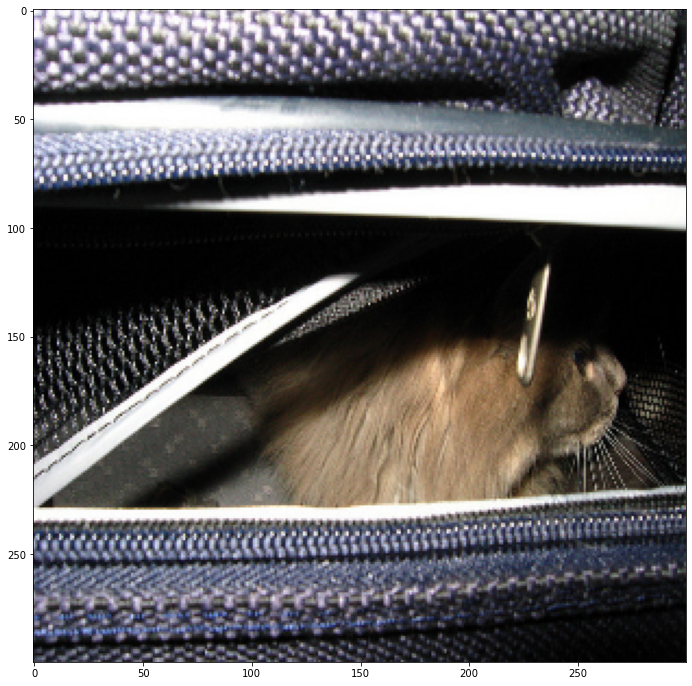

In [85]:
plt.imshow(image)

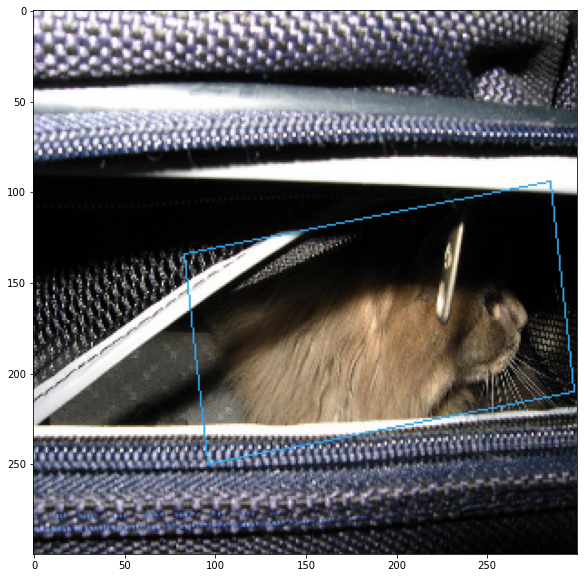

In [87]:
corners = np.array(labelled_gt_box_coords[0][1:])

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [88]:
labels_map = {1: 1, 3: 2, 17: 3, 18: 4}

In [89]:
gt_labels = [labels_map[l[0]] for l in labelled_gt_box_coords]
gt_boxes_normalized = [l[1:] for l in labelled_gt_box_coords]
gt_boxes_coco = [l[1:] for l in labelled_gt_coco]

In [90]:
gt_labels

[3]

In [91]:
IOU_map = np.zeros((1, len(prior_boxes), len(gt_boxes_normalized)))

# IOU_map = np.zeros((len(prior_boxes), len(gt_boxes_normalized)))

for i in range(len(labelled_gt_box_coords)):
    IOU_map[:, :, i] = getIOUOverallDefaultBox(prior_boxes, np.array(gt_boxes_normalized[i]))

In [92]:
tf.constant(prior_boxes_coco, np.float32)

<tf.Tensor: shape=(36320, 5), dtype=float32, numpy=
array([[  3.9473684,   3.9473684,  30.       ,  30.       ,  -0.7853982],
       [  3.9473684,   3.9473684,  30.       ,  30.       ,   0.       ],
       [  3.9473684,   3.9473684,  30.       ,  30.       ,   0.7853982],
       ...,
       [150.       , 150.       , 127.27922  , 254.55844  ,   0.       ],
       [150.       , 150.       , 127.27922  , 254.55844  ,   0.7853982],
       [150.       , 150.       , 127.27922  , 254.55844  ,   1.5707964]],
      dtype=float32)>

In [93]:
def calculate_offset_from_gt(gt_boxes_mapped_to_prior, prior_boxes):
    prior_boxes = tf.expand_dims(prior_boxes, axis=0)
    g_j_cx = 10 * (gt_boxes_mapped_to_prior[:, :, 0] - prior_boxes[:, :, 0]) / prior_boxes[:, :, 2]
    g_j_cy = 10 * (gt_boxes_mapped_to_prior[:, :, 1] - prior_boxes[:, :, 1]) / prior_boxes[:, :, 3]
    g_j_w = 5 * tf.math.log(gt_boxes_mapped_to_prior[:, :, 2] / prior_boxes[:, :, 2])
    g_j_h = 5 * tf.math.log(gt_boxes_mapped_to_prior[:, :, 3] / prior_boxes[:, :, 3])

    g_theta = tf.math.tan(gt_boxes_mapped_to_prior[:, :, 4] - prior_boxes[:, :, 4])

    offset = tf.concat( [ g_j_cx, g_j_cy, g_j_w, g_j_h, g_theta ] , axis = 0)

    return tf.transpose(tf.expand_dims(offset, axis = 0), perm=[0,2,1])

In [94]:
# select the box with the highest IOU
highest_overlap_idx = tf.math.argmax(IOU_map, axis = 1)
highest_overlap_idx = tf.cast(highest_overlap_idx, tf.int32)
idx = tf.range(IOU_map.shape[1])
highest_overlap_idx_map = tf.expand_dims(tf.equal(idx, tf.transpose(highest_overlap_idx)), axis = 0)
# set the highest overlap to 1
IOU_map = tf.where(tf.transpose(highest_overlap_idx_map, perm=[0,2,1]), tf.constant(1.0), IOU_map)

# find the column idx with the highest IOU at each row
max_IOU_idx_per_row = tf.math.argmax(IOU_map, axis = 2)
# find the max value per row
max_IOU_per_row = tf.reduce_max(IOU_map, axis = 2)

# threshold IOU
max_IOU_above_threshold = tf.greater(max_IOU_per_row, 0.5)

# map the gt boxes to the prior boxes with the highest overlap
gt_box_label_map = tf.gather(gt_boxes_coco, max_IOU_idx_per_row, batch_dims = 0)

gt_box_label_map_offsets = calculate_offset_from_gt(gt_box_label_map, tf.constant(prior_boxes_coco, np.float32))

# remove from gt_boxes_map where overlap with prior boxes is less than 0.5
gt_boxes_map_offset_suppressed = tf.where( tf.expand_dims(max_IOU_above_threshold, -1),  
                                    gt_box_label_map_offsets, tf.zeros_like(gt_box_label_map))
# add a positive condition column for the localization loss
max_IOU_above_threshold_expand = tf.expand_dims(max_IOU_above_threshold, -1)
max_IOU_above_threshold_expand = tf.cast(max_IOU_above_threshold_expand, tf.float32)
gt_boxes_map_offset_suppressed_with_pos_cond = tf.concat([  gt_boxes_map_offset_suppressed, 
                                                            max_IOU_above_threshold_expand ], axis = 2)
                                                         
gt_labels_map = tf.gather(gt_labels, max_IOU_idx_per_row, batch_dims = 0)
# suppress the label where IOU with the gt boxes is < 0.5
gt_labels_map_suppressed = tf.where( max_IOU_above_threshold, 
                                    gt_labels_map, tf.zeros_like(gt_labels_map))
gt_labels_one_hot_encoded = tf.one_hot(gt_labels_map_suppressed, 4)

In [95]:
gt_labels

[3]

In [96]:
for i, label in enumerate(gt_labels_one_hot_encoded[0]):
    l = label.numpy()
    if sum(l[1:]) > 0:
        print(i)

36055
36056
36060
36064


In [97]:
prior_boxes[36055]

array([215.00775803,  60.13942823, 299.86057177, 144.99224197,
       204.99224197, 239.86057177, 120.13942823, 155.00775803])

In [98]:
image_copy = image.copy()

In [99]:
corners

array([[[ 83, 134]],

       [[285,  94]],

       [[298, 210]],

       [[ 96, 250]]], dtype=int32)

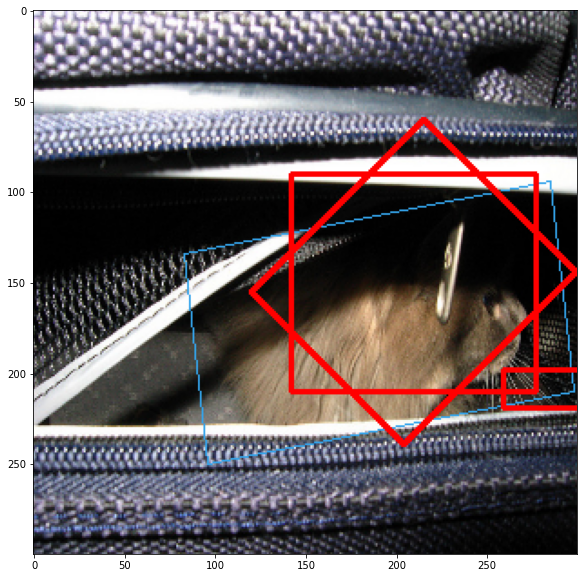

In [102]:
corners = np.array(prior_boxes[36056])

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image_copy, [corners],
                      True, (255, 0, 0), 2)
        
plt.figure(figsize=(10,10))

plt.imshow(image_copy)

In [32]:
from data_pipeline.dataGenerator import DataGenerator

In [111]:
prior_boxes, prior_boxes_coco = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

prior_boxes = np.array(prior_boxes, dtype=np.float32)

prior_boxes_coco = np.array(prior_boxes_coco, dtype=np.float32)

list_IDs = glob.glob('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/*.txt')

list_IDs = [l.split('/')[-1].replace('.txt', '') for l in list_IDs]

In [112]:
label_path = '/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/'
image_path = '/Users/usmanr/fiftyone/coco-2014/train/data/'

In [150]:
dg = DataGenerator(list_IDs, 
                   label_path,
                   image_path, 
                   prior_boxes,
                   prior_boxes_coco,
                  batch_size=16,
                   n_classes=4,
                  image_extension='.jpg')

In [151]:
%%time

for d in dg:
    holdout = d
    break

CPU times: user 59.2 s, sys: 1.08 s, total: 1min
Wall time: 5.55 s


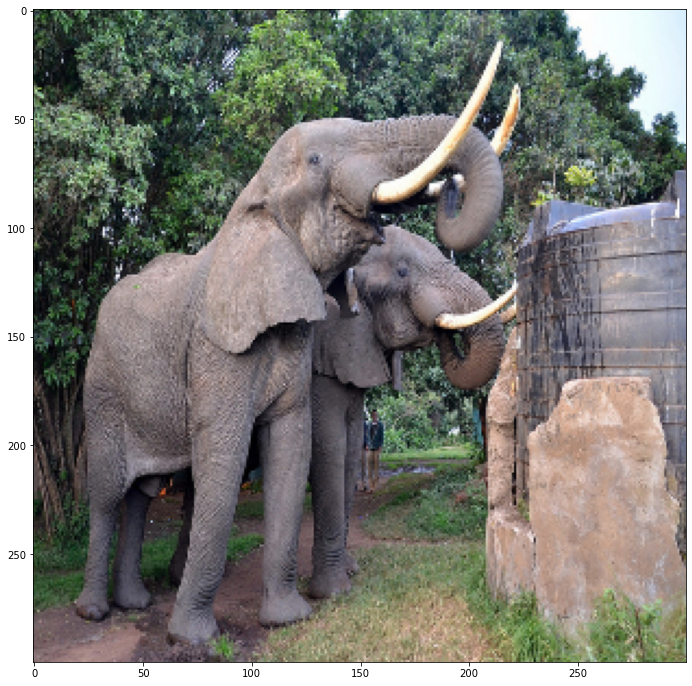

In [135]:
plt.imshow(holdout[0][1])

In [136]:
holdout[1][1][1]

<tf.Tensor: shape=(36320, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [137]:
for i, label in enumerate(holdout[1][1][1]):
    l = label.numpy()
    if sum(l[1:]) > 0:
        print(i)

14190
14224
14982


In [138]:
image_copy = holdout[0][1].copy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


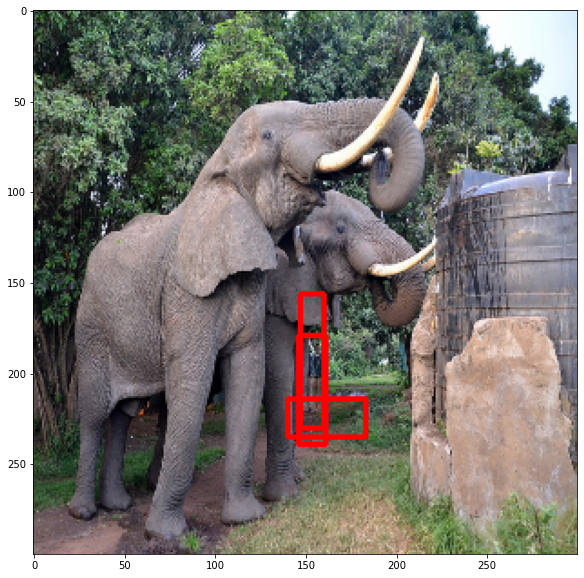

In [141]:
corners = np.array(prior_boxes[14982]) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image_copy, [corners],
                      True, (255, 0, 0), 2)
        
plt.figure(figsize=(10,10))

plt.imshow(image_copy)